In [3]:
%matplotlib inline
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
import cv2
#import cv2.xfeatures2d
#sift = cv2.xfeatures2d.SIFT_create() #cv2.SIFT
#type(sift)

cv2.xfeatures2d_SIFT

In [6]:
import util
reload(util)
from util import *

Hack to get Notebook file name

In [7]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FILE_NAME = '" + nb.notebook_name + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

## Commiting

To commit changes to this notebook, save, then run the following cell.
It will push to the changes to https://github.com/wcyuan/opencv_ipynotebook

In [8]:
from util import commit
#commit(file=NOTEBOOK_FILE_NAME, msg="Periodic update")

In [43]:
#orig_conan_video="/home/murali/ipynb/video/tennis.mp4"
#video_file="/home/murali/ipynb/video/slow_motion_serve_just_long.mov"
video_file="/home/murali/ipynb/video/reg_ss_ad_48_73.mov"; frame_start=47; frame_end=73

In [44]:
%time frames = read_video_frames(video_file, frame_start, frame_end)

[20150829 17:12:28.525594] Converting to np array
(1080, 1920, 3)
(26, 1080, 1920, 3)
[20150829 17:12:28.555746] Done
CPU times: user 1.55 s, sys: 53.1 ms, total: 1.6 s
Wall time: 376 ms


In [37]:
ii=24

frame # 26


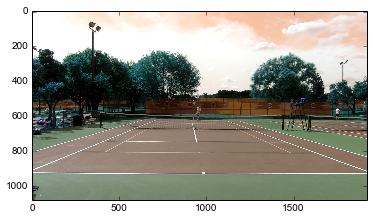

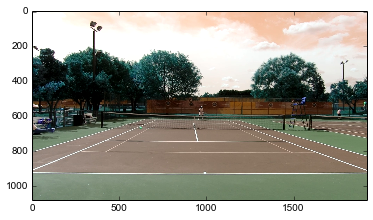

In [42]:
# video metadata from avconv:
#
#Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'tennis.mp4':
#  Metadata:
#    major_brand     : dash
#    minor_version   : 0
#    compatible_brands: iso6avc1mp41  
#    creation_time   : 2013-08-25 02:46:14
#  Duration: 00:00:25.15, start: 0.000000, bitrate: 112 kb/s
#    Stream #0.0(und): Video: h264 (Constrained Baseline), yuv420p, 192x144, 110 kb/s, 15 fps, 15 tbr, 90k tbn, 30 tbc
#    Metadata:
#      creation_time   : 2013-08-25 02:46:14
#[libx264 @ 0x900f1a0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2
#[libx264 @ 0x900f1a0] profile High, level 1.1
#[libx264 @ 0x900f1a0] 264 - core 142 r2389 956c8d8 - H.264/MPEG-4 AVC codec - Copyleft 2003-2014 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=1 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=15 scenecut=40 intra_refresh=0 rc_lookahead=40 rc=crf mbtree=1 crf=23.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.25 aq=1:1.00
#
# In particular, it's 15 frames / second
#
# I don't yet know how to get the frames / second info from opencv, if it's even possible.
#
# First serve:
# ball is hit at frame 33
# hits the ground at frame 42
# 79 mph
#
# Second serve:
# ball is hit at frame 99
# hits the ground at frame 109
# 77 mph
#
# Frame 138 -- a new scene (same view)
# Third serve:
# ball is hit at frame 163, or perhaps between 162-163
# hits the ground at frame 169
# 95 mph
#
# Note, most frames have multiple ball images, or maybe the ball is an elogated thing, so you
# can sort of see the direction it's traveling in
#
# This video is very steady, it must have been taken with a tripod.
#
print "frame #", ii
#for ii in range(25):
pylab.figure()
pylab.imshow(frames[0])
pylab.figure()
pylab.imshow(frames[24])

ii += 1


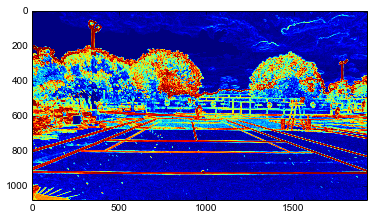

In [45]:

diff_median(frames, 0,25)

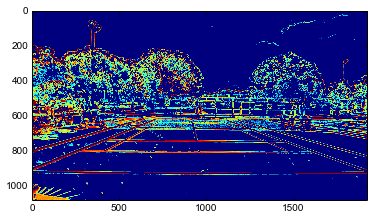

In [47]:
diff_filtered_median(frames, 0,25,clean=True)
#figure()
#diff_filtered_median(frames, 90,110)
#figure()
#diff_filtered_median(frames, 160, 170)